# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_4:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


## Importing Libraries

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

### 1.1.1 Reading data from train_data and resources file.

In [2]:
#https://stackoverflow.com/questions/48908772/read-csv-with-pandas-from-subdirectory-on-windows-and-unix
from pathlib import Path
root = Path()
root

PosixPath('.')

In [3]:
project_data = pd.read_csv(root / 'train_data.csv')
resource_data = pd.read_csv(root / 'resources.csv')

### 1.1.2 Restricting data to only 10k data points as higher points are taking way too long.

In [4]:
project_data=project_data.loc[:9999,]

In [5]:
project_data.describe()

Unnamed: 0  teacher_number_of_previously_posted_projects  \
count   10000.000000                                  10000.000000   
mean    90799.705200                                     11.209200   
std     52304.354247                                     27.933537   
min         5.000000                                      0.000000   
25%     45444.000000                                      0.000000   
50%     90925.500000                                      2.000000   
75%    135815.000000                                      9.000000   
max    182063.000000                                    378.000000   

       project_is_approved  
count         10000.000000  
mean              0.850000  
std               0.357089  
min               0.000000  
25%               1.000000  
50%               1.000000  
75%               1.000000  
max               1.000000

In [6]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (10000, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


### Conclusion
 - There are 17 columns in the project_data namely 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved'

In [7]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

          project_subject_categories     project_subject_subcategories  \
0                Literacy & Language                     ESL, Literacy   
1  History & Civics, Health & Sports  Civics & Government, Team Sports   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  
0                                             0                    0  
1                                             7                    1

In [8]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

### Conlusion
- There are 4 columns in resources data frames namely id, description, quantity and price.

# 1.2 Data Analysis

Number of projects thar are approved for funding  8500 , ( 85.0 %)
Number of projects thar are not approved for funding  1500 , ( 15.0 %)


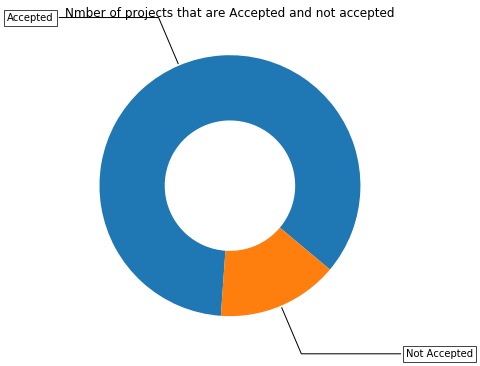

In [9]:
# PROVIDE CITATIONS TO YOUR CODE IF YOU TAKE IT FROM ANOTHER WEBSITE.
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py


y_value_counts = project_data['project_is_approved'].value_counts()
print("Number of projects thar are approved for funding ", y_value_counts[1], ", (", (y_value_counts[1]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print("Number of projects thar are not approved for funding ", y_value_counts[0], ", (", (y_value_counts[0]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
recipe = ["Accepted", "Not Accepted"]

data = [y_value_counts[1], y_value_counts[0]]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Nmber of projects that are Accepted and not accepted")

plt.show()

### Conclusion
 - The above chart displays that we have an unbalanced dataset with 85% projects as approved and around 15% as not accepted projects. 

### 1.2.1 Univariate Analysis: School State

In [10]:
# Pandas dataframe groupby count, mean: https://stackoverflow.com/a/19385591/4084039

temp = pd.DataFrame(project_data.groupby("school_state")["project_is_approved"].apply(np.mean)).reset_index()
# if you have data which contain only 0 and 1, then the mean = percentage (think about it)
temp.columns = ['state_code', 'num_proposals']

'''# How to plot US state heatmap: https://datascience.stackexchange.com/a/9620

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = temp['state_code'],
        z = temp['num_proposals'].astype(float),
        locationmode = 'USA-states',
        text = temp['state_code'],
        marker = dict(line = dict (color = 'rgb(255,255,255)',width = 2)),
        colorbar = dict(title = "% of pro")
    ) ]

layout = dict(
        title = 'Project Proposals % of Acceptance Rate by US States',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='us-map-heat-map')
'''

'# How to plot US state heatmap: https://datascience.stackexchange.com/a/9620\n\nscl = [[0.0, \'rgb(242,240,247)\'],[0.2, \'rgb(218,218,235)\'],[0.4, \'rgb(188,189,220)\'],            [0.6, \'rgb(158,154,200)\'],[0.8, \'rgb(117,107,177)\'],[1.0, \'rgb(84,39,143)\']]\n\ndata = [ dict(\n        type=\'choropleth\',\n        colorscale = scl,\n        autocolorscale = False,\n        locations = temp[\'state_code\'],\n        z = temp[\'num_proposals\'].astype(float),\n        locationmode = \'USA-states\',\n        text = temp[\'state_code\'],\n        marker = dict(line = dict (color = \'rgb(255,255,255)\',width = 2)),\n        colorbar = dict(title = "% of pro")\n    ) ]\n\nlayout = dict(\n        title = \'Project Proposals % of Acceptance Rate by US States\',\n        geo = dict(\n            scope=\'usa\',\n            projection=dict( type=\'albers usa\' ),\n            showlakes = True,\n            lakecolor = \'rgb(255, 255, 255)\',\n        ),\n    )\n\nfig = go.Figure(data=dat

In [11]:
# https://www.csi.cuny.edu/sites/default/files/pdf/administration/ops/2letterstabbrev.pdf
temp.sort_values(by=['num_proposals'], inplace=True)
print("States with lowest % approvals")
print(temp.head(5))
print('='*50)
print("States with highest % approvals")
print(temp.tail(5))

States with lowest % approvals
   state_code  num_proposals
50         WY       0.727273
41         SD       0.733333
26         MT       0.736842
7          DC       0.750000
37         OR       0.793388
States with highest % approvals
   state_code  num_proposals
8          DE       0.896552
17         KY       0.899225
32         NM       0.906977
16         KS       0.954545
28         ND       1.000000


### Conclusion
 - ND and KS states have highest approvels.
 - WY and SD states have lowerest approvels.

In [12]:
#stacked bar plots matplotlib: https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
def stack_plot(data, xtick, col2='project_is_approved', col3='total'):
    ind = np.arange(data.shape[0])
    
    plt.figure(figsize=(20,5))
    p1 = plt.bar(ind, data[col3].values)
    p2 = plt.bar(ind, data[col2].values)

    plt.ylabel('Projects')
    plt.title('Number of projects aproved vs rejected')
    plt.xticks(ind, list(data[xtick].values))
    plt.legend((p1[0], p2[0]), ('total', 'accepted'))
    plt.show()

In [13]:
def univariate_barplots(data, col1, col2='project_is_approved', top=False):
    # Count number of zeros in dataframe python: https://stackoverflow.com/a/51540521/4084039
    temp = pd.DataFrame(project_data.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()

    # Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
    temp['total'] = pd.DataFrame(project_data.groupby(col1)[col2].agg({'total':'count'})).reset_index()['total']
    temp['Avg'] = pd.DataFrame(project_data.groupby(col1)[col2].agg({'Avg':'mean'})).reset_index()['Avg']
    
    temp.sort_values(by=['total'],inplace=True, ascending=False)
    
    if top:
        temp = temp[0:top]
    
    stack_plot(temp, xtick=col1, col2=col2, col3='total')
    print(temp.head(5))
    print("="*50)
    print(temp.tail(5))

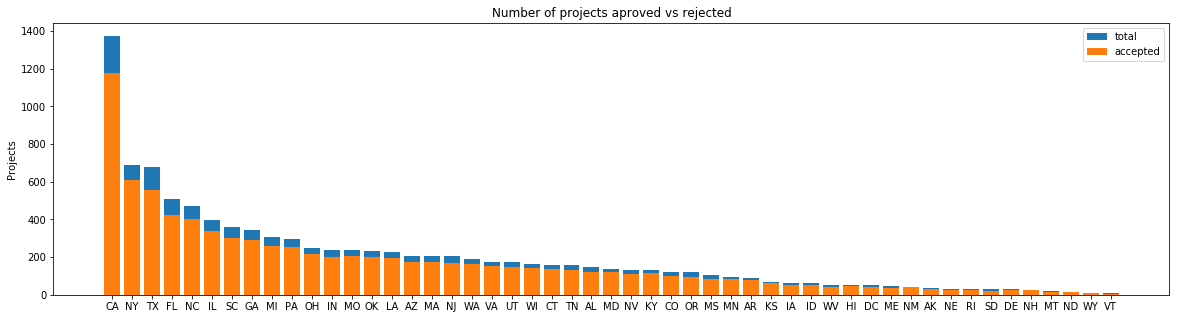

   school_state  project_is_approved  total       Avg
4            CA                 1177   1374  0.856623
34           NY                  608    689  0.882438
43           TX                  558    680  0.820588
9            FL                  422    508  0.830709
27           NC                  400    469  0.852878
   school_state  project_is_approved  total       Avg
30           NH                   24     28  0.857143
26           MT                   14     19  0.736842
28           ND                   14     14  1.000000
50           WY                    8     11  0.727273
46           VT                    6      7  0.857143


In [14]:
univariate_barplots(project_data, 'school_state', 'project_is_approved', False)

__SUMMARY: Every state has greater than 80% success rate in approval__

### Conclusion
 - CA and NY have the top two states with highest number of projects that are approved with high approval ratio of 85% and 88%.
 - WY and VT states have lowest numbers of projects being stubmmited. WY has very low approval rate. 
 - ND has 100% approval rate.
 

### 1.2.2 Univariate Analysis: teacher_prefix

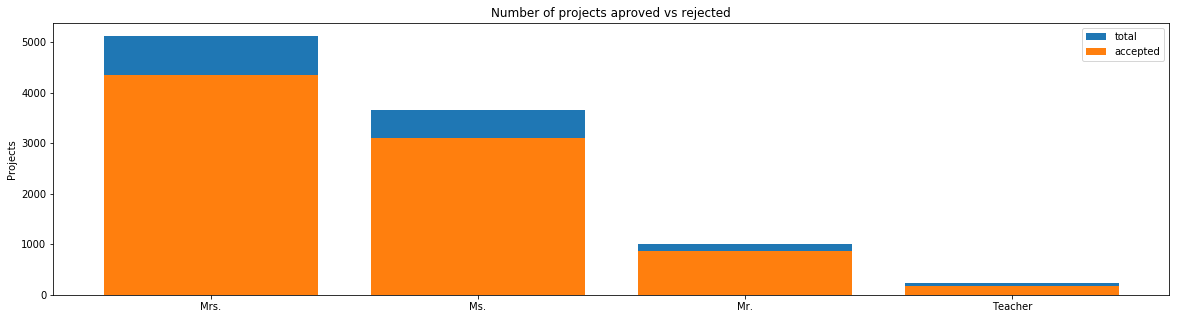

  teacher_prefix  project_is_approved  total       Avg
1           Mrs.                 4354   5120  0.850391
2            Ms.                 3110   3647  0.852756
0            Mr.                  861   1006  0.855865
3        Teacher                  174    226  0.769912
  teacher_prefix  project_is_approved  total       Avg
1           Mrs.                 4354   5120  0.850391
2            Ms.                 3110   3647  0.852756
0            Mr.                  861   1006  0.855865
3        Teacher                  174    226  0.769912


In [15]:
univariate_barplots(project_data, 'teacher_prefix', 'project_is_approved' , top=False)

### Conclusion
 - Female teachers with prefix "Mrs" or "Ms" are submitting highest number of projects for approval.

### 1.2.3 Univariate Analysis: project_grade_category

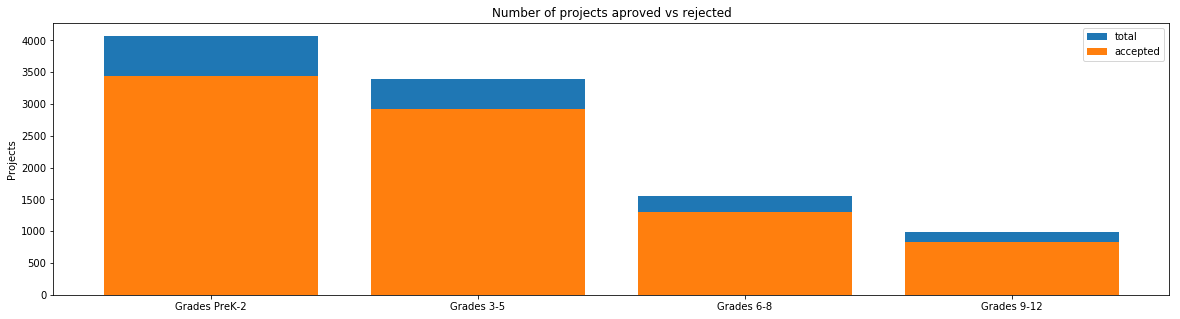

  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                 3441   4069  0.845662
0             Grades 3-5                 2920   3390  0.861357
1             Grades 6-8                 1305   1546  0.844114
2            Grades 9-12                  834    995  0.838191
  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                 3441   4069  0.845662
0             Grades 3-5                 2920   3390  0.861357
1             Grades 6-8                 1305   1546  0.844114
2            Grades 9-12                  834    995  0.838191


In [16]:
univariate_barplots(project_data, 'project_grade_category', 'project_is_approved', top=False)

### Conclusion
 - Highest number of projects are being posted for lower grades i.e. PreK-2 and 3-5 with approval rate close to overall approval rate.

### 1.2.4 Univariate Analysis: project_subject_categories

In [17]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())

In [18]:
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

      project_subject_subcategories  \
0                     ESL, Literacy   
1  Civics & Government, Team Sports   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories  
0             Literacy_Language  
1  History_Civics Health_Sports

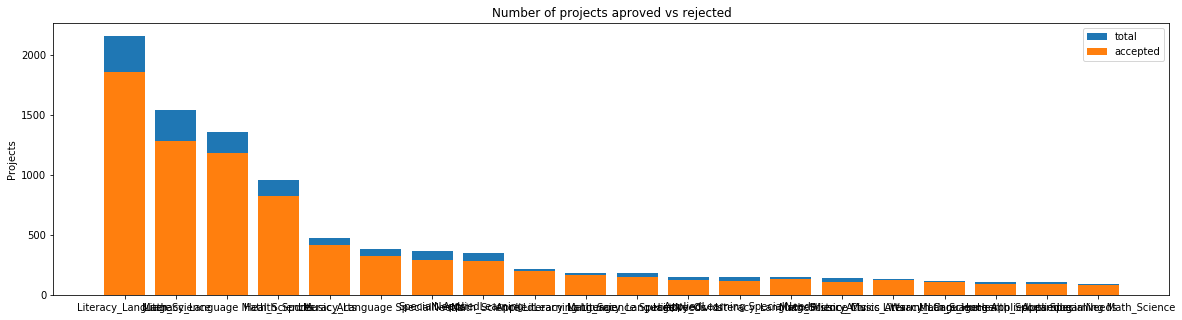

                  clean_categories  project_is_approved  total       Avg
23               Literacy_Language                 1856   2160  0.859259
31                    Math_Science                 1284   1546  0.830530
27  Literacy_Language Math_Science                 1183   1360  0.869853
8                    Health_Sports                  826    961  0.859521
39                      Music_Arts                  415    477  0.870021
                    clean_categories  project_is_approved  total       Avg
19  History_Civics Literacy_Language                  127    135  0.940741
49                Warmth Care_Hunger                  105    115  0.913043
32      Math_Science AppliedLearning                   93    111  0.837838
14        Health_Sports SpecialNeeds                   93    110  0.845455
4       AppliedLearning Math_Science                   79     95  0.831579


In [19]:
univariate_barplots(project_data, 'clean_categories', 'project_is_approved', top=20)

### Conclusion
 - Literacy Language, Math and Science have the highest number of projects that are submitted.
 - Literacy Language, History and Civics, Warmth and Care have high approval rates (being above average) at 94% and 91%

In [20]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

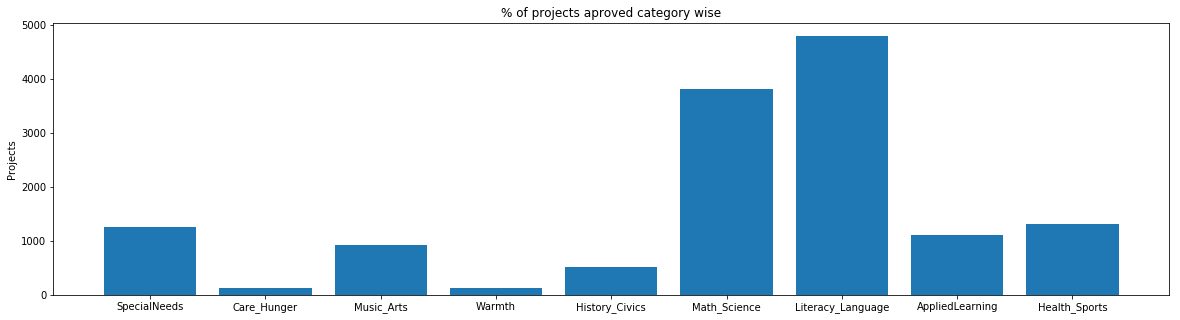

In [21]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(sorted_cat_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_cat_dict.values()))

plt.ylabel('Projects')
plt.title('% of projects aproved category wise')
plt.xticks(ind, list(sorted_cat_dict.keys()))
plt.show()

In [22]:
for i, j in sorted_cat_dict.items():
    print("{:20} :{:10}".format(i,j))

SpecialNeeds         :      1260
Care_Hunger          :       127
Music_Arts           :       930
Warmth               :       127
History_Civics       :       522
Math_Science         :      3812
Literacy_Language    :      4787
AppliedLearning      :      1116
Health_Sports        :      1317


### 1.2.5 Univariate Analysis: project_subject_subcategories

In [23]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

In [24]:
project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  
0             Literacy_Language                  ESL Literacy  
1  History_Civics Health_Sports  Civics_Government TeamSports

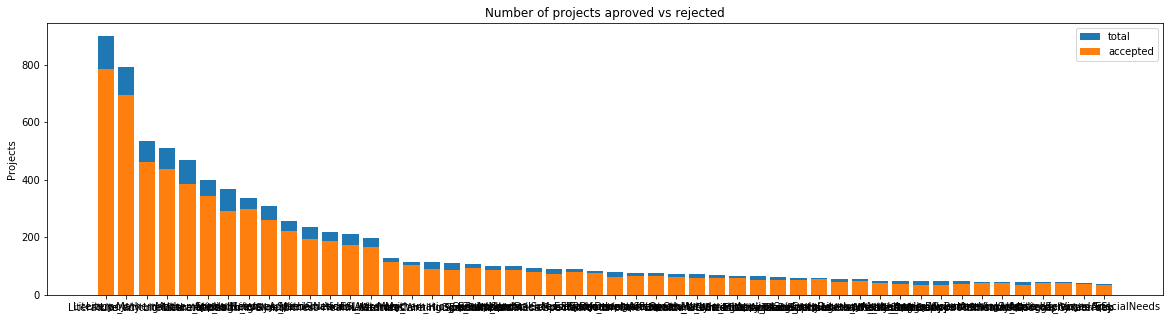

                clean_subcategories  project_is_approved  total       Avg
231                        Literacy                  784    899  0.872080
233            Literacy Mathematics                  694    790  0.878481
244  Literature_Writing Mathematics                  461    535  0.861682
232     Literacy Literature_Writing                  436    510  0.854902
254                     Mathematics                  386    470  0.821277
                    clean_subcategories  project_is_approved  total       Avg
3    AppliedSciences College_CareerPrep                   36     44  0.818182
222          History_Geography Literacy                   42     44  0.954545
241                 Literacy VisualArts                   41     44  0.931818
23         AppliedSciences SpecialNeeds                   37     42  0.880952
101                                 ESL                   34     38  0.894737


In [25]:
univariate_barplots(project_data, 'clean_subcategories', 'project_is_approved', top=50)

### Conclusion
 - As with categories, Literacy and Mathematics are two main subcategories under which maximum projects are submitted. 

In [26]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())

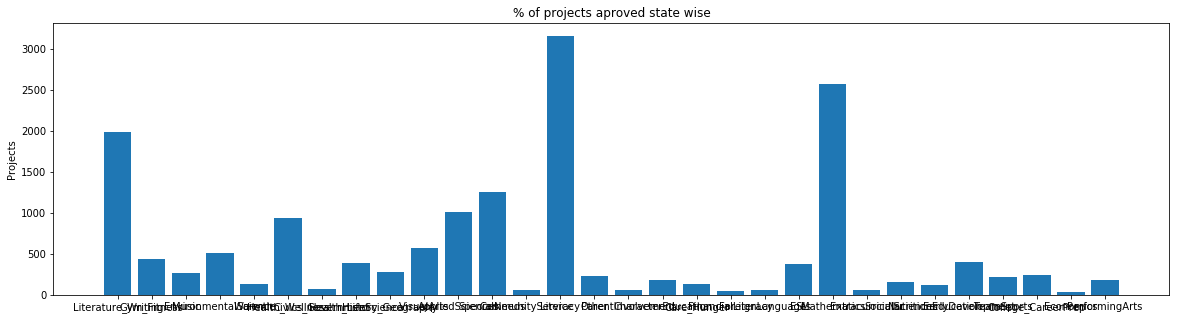

In [27]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(sorted_sub_cat_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_sub_cat_dict.values()))

plt.ylabel('Projects')
plt.title('% of projects aproved state wise')
plt.xticks(ind, list(sorted_sub_cat_dict.keys()))
plt.show()

In [28]:
for i, j in sorted_sub_cat_dict.items():
    print("{:20} :{:10}".format(i,j))

Literature_Writing   :      1988
Gym_Fitness          :       443
Music                :       266
EnvironmentalScience :       507
Warmth               :       127
Health_Wellness      :       934
Civics_Government    :        72
Health_LifeScience   :       391
History_Geography    :       276
VisualArts           :       575
AppliedSciences      :      1009
SpecialNeeds         :      1260
CommunityService     :        56
Literacy             :      3156
Other                :       229
ParentInvolvement    :        65
CharacterEducation   :       178
Care_Hunger          :       127
FinancialLiteracy    :        47
ForeignLanguages     :        63
ESL                  :       378
Mathematics          :      2573
Extracurricular      :        65
SocialSciences       :       157
NutritionEducation   :       115
EarlyDevelopment     :       396
TeamSports           :       218
College_CareerPrep   :       244
Economics            :        33
PerformingArts       :       183


### 1.2.6 Univariate Analysis: Text features (Title)

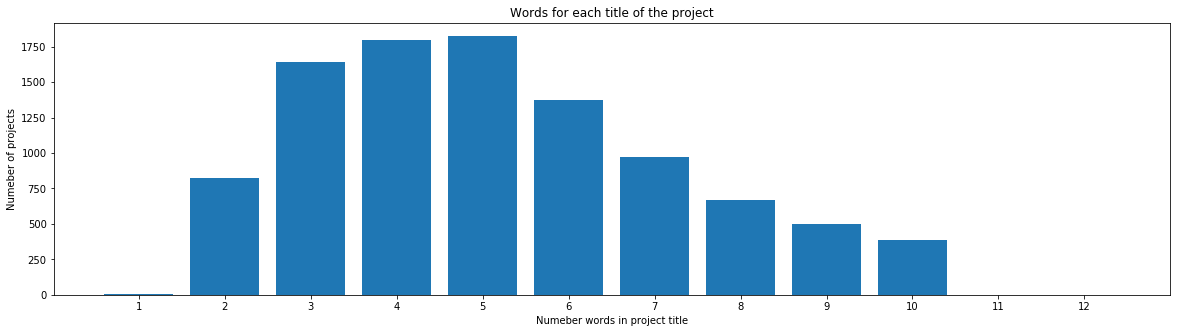

In [29]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
word_count = project_data['project_title'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))

plt.ylabel('Numeber of projects')
plt.xlabel('Numeber words in project title')
plt.title('Words for each title of the project')
plt.xticks(ind, list(word_dict.keys()))
plt.show()

In [30]:
approved_title_word_count = project_data[project_data['project_is_approved']==1]['project_title'].str.split().apply(len)
approved_title_word_count = approved_title_word_count.values

rejected_title_word_count = project_data[project_data['project_is_approved']==0]['project_title'].str.split().apply(len)
rejected_title_word_count = rejected_title_word_count.values

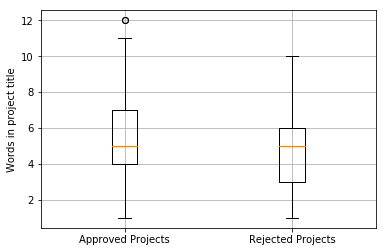

In [31]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_title_word_count, rejected_title_word_count])
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project title')
plt.grid()
plt.show()

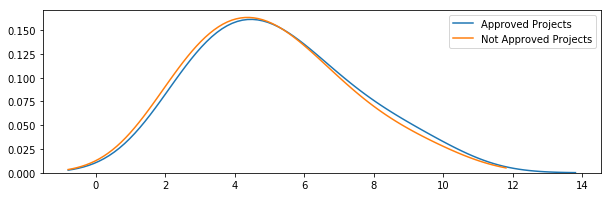

In [32]:
plt.figure(figsize=(10,3))
sns.kdeplot(approved_title_word_count,label="Approved Projects", bw=0.6)
sns.kdeplot(rejected_title_word_count,label="Not Approved Projects", bw=0.6)
plt.legend()
plt.show()

### Conclusion
 - Number of words in project title follows a bell curve. 
 - Titles with over 12 words are rare but have high approval rate.

### 1.2.7 Univariate Analysis: Text features (Project Essay's)

In [33]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [34]:
approved_word_count = project_data[project_data['project_is_approved']==1]['essay'].str.split().apply(len)
approved_word_count = approved_word_count.values

rejected_word_count = project_data[project_data['project_is_approved']==0]['essay'].str.split().apply(len)
rejected_word_count = rejected_word_count.values

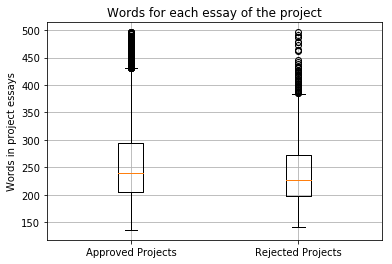

In [35]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_word_count, rejected_word_count])
plt.title('Words for each essay of the project')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project essays')
plt.grid()
plt.show()

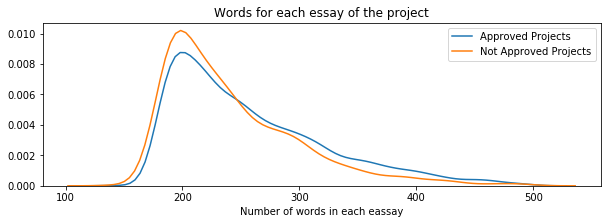

In [36]:
plt.figure(figsize=(10,3))
sns.distplot(approved_word_count, hist=False, label="Approved Projects")
sns.distplot(rejected_word_count, hist=False, label="Not Approved Projects")
plt.title('Words for each essay of the project')
plt.xlabel('Number of words in each eassay')
plt.legend()
plt.show()

### Conclusion
 - Number of words in project essay is right skew with long tail. 

### 1.2.8 Univariate Analysis: Cost per project

In [37]:
# we get the cost of the project using resource.csv file
resource_data.head(2)

id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [38]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

id  quantity   price
0  p000001         7  459.56
1  p000002        21  515.89

In [39]:
# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [40]:
approved_price = project_data[project_data['project_is_approved']==1]['price'].values

rejected_price = project_data[project_data['project_is_approved']==0]['price'].values

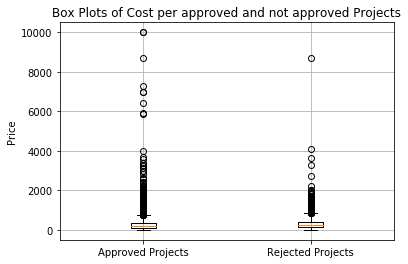

In [41]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_price, rejected_price])
plt.title('Box Plots of Cost per approved and not approved Projects')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Price')
plt.grid()
plt.show()

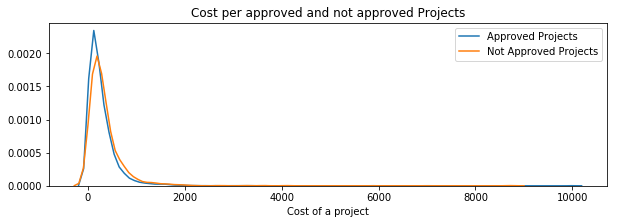

In [42]:
plt.figure(figsize=(10,3))
sns.distplot(approved_price, hist=False, label="Approved Projects")
sns.distplot(rejected_price, hist=False, label="Not Approved Projects")
plt.title('Cost per approved and not approved Projects')
plt.xlabel('Cost of a project')
plt.legend()
plt.show()

### Conclusion
 - Projects with low costs per project have high approval rate. 
 - Projects with high costs per project was few and far in between. 

In [43]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["Percentile", "Approved Projects", "Not Approved Projects"]

for i in range(0,101,5):
    x.add_row([i,np.round(np.percentile(approved_price,i), 3), np.round(np.percentile(rejected_price,i), 3)])
print(x)

+------------+-------------------+-----------------------+
| Percentile | Approved Projects | Not Approved Projects |
+------------+-------------------+-----------------------+
|     0      |        1.44       |          4.96         |
|     5      |       13.82       |         39.489        |
|     10     |       33.227      |         72.839        |
|     15     |       55.606      |         99.404        |
|     20     |       75.696      |        121.922        |
|     25     |       99.958      |        140.925        |
|     30     |      117.103      |        157.226        |
|     35     |      137.082      |        179.912        |
|     40     |       157.0       |        203.976        |
|     45     |       176.55      |        227.665        |
|     50     |      197.935      |         252.04        |
|     55     |      223.151      |        277.722        |
|     60     |       253.83      |        307.592        |
|     65     |      283.827      |        345.176       

<h3><font color='red'>1.2.9 Univariate Analysis: teacher_number_of_previously_posted_projects</font></h3>

Please do this on your own based on the data analysis that was done in the above cells

#### 1.2.9.1 Displaying top 5 rows of project_data table

In [44]:
#sol
project_data.head(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   
2       21895  p182444  3465aaf82da834c0582ebd0ef8040ca0            Ms.   
3          45  p246581  f3cb9bffbba169bef1a77b243e620b60           Mrs.   
4      172407  p104768  be1f7507a41f8479dc06f047086a39ec           Mrs.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   
2           AZ        2016-08-31 12:03:56             Grades 6-8   
3           KY        2016-10-06 21:16:17          Grades PreK-2   
4           TX        2016-07-11 01:10:09          Grades PreK-2   

                                       project_title  \
0   Educational Support for English Learners at Home   
1              Wanted: Projector for Hungry Learners   
2  Soccer Equipment for AWESOME Middle School Stu...   
3                             Techie Kindergarteners   
4                             Interactive Math Tools   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   
2  \r\n\"True champions aren't always the ones th...   
3  I work at a unique school filled with both ESL...   
4  Our second grade classroom next year will be m...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   
2  The students on the campus come to school know...             NaN   
3  My students live in high poverty conditions wi...             NaN   
4  For many students, math is a subject that does...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   
2             NaN  My students need shine guards, athletic socks,...   
3             NaN  My students need to engage in Reading and Math...   
4             NaN  My students need hands on practice in mathemat...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   
2                                             1                    0   
3                                             4                    1   
4                                             1                    1   

                 clean_categories           clean_subcategories  \
0               Literacy_Language                  ESL Literacy   
1    History_Civics Health_Sports  Civics_Government TeamSports   
2                   Health_Sports    Health_Wellness TeamSports   
3  Literacy_Language Math_Science          Literacy Mathematics   
4                    Math_Science                   Mathematics   

                                               essay  quantity   price  
0  My students are English learners that are work...        23  154.60  
1  Our students arrive to our school eager to lea...         1  299.00  
2  \r\n\"True champions aren't always the ones th...        22  516.85  
3  I work at a unique school filled with both ESL...         4  232.90  
4  Our second grade classroom next year will be m...         4   67.98

#### 1.2.9.2 Seperation of approved and rejected projects and storing values for number of previously posted projects

In [45]:
approve_pj=project_data[project_data['project_is_approved']==1]['teacher_number_of_previously_posted_projects'].values
reject_pj=project_data[project_data['project_is_approved']==0]['teacher_number_of_previously_posted_projects'].values
#approve_pj.head()

#### 1.2.9.3 Box Plot for number of previously posted projects

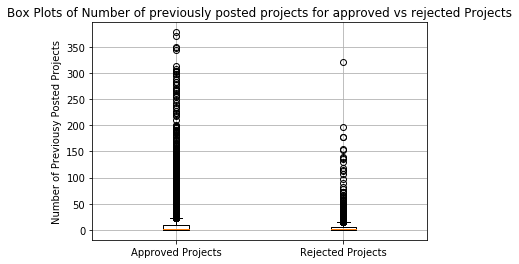

In [46]:
#reject_pj.head()
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approve_pj, reject_pj])
plt.title('Box Plots of Number of previously posted projects for approved vs rejected Projects')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Number of Previousy Posted Projects')
plt.grid()
plt.show()

#### Conclusion
 - The above chart shows that there is a higher chance of approval if a teacher has already posted projects.

#### 1.2.9.4 Histogram for number of previously posted approved and rejected projects

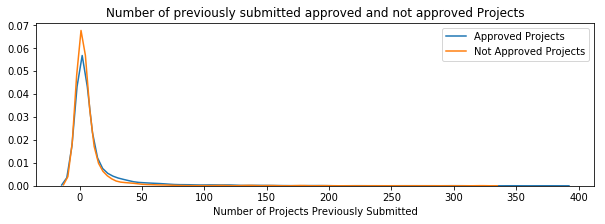

In [47]:
plt.figure(figsize=(10,3))
sns.distplot(approve_pj, hist=False, label="Approved Projects")
sns.distplot(reject_pj, hist=False, label="Not Approved Projects")
plt.title('Number of previously submitted approved and not approved Projects')
plt.xlabel('Number of Projects Previously Submitted')
plt.legend()
plt.show()

### Conclusion
 - The above histogram is right skew with long tail. 
 - Similar to bar plots, we observe that the blue line for approved projects runs longer than for not approved projects.

In [48]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
#teacher_gp= project_data.loc[:,['teacher_id','teacher_number_of_previously_posted_projects','project_is_approved']].groupby('teacher_id')
#teacher_gp=teacher_gp.agg({'teacher_number_of_previously_posted_projects':'sum','project_is_approved':'sum'})
#print(teacher_gp.head())

#### 1.2.9.5 Percentile table for understanding relationship between number of previously posted projects for  approved and rejected projects

In [49]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["Percentile", "Approved Projects", "Not Approved Projects"]

for i in range(0,101,5):
    x.add_row([i,np.round(np.percentile(approve_pj,i), 3), np.round(np.percentile(reject_pj,i), 3)])
print(x)

+------------+-------------------+-----------------------+
| Percentile | Approved Projects | Not Approved Projects |
+------------+-------------------+-----------------------+
|     0      |        0.0        |          0.0          |
|     5      |        0.0        |          0.0          |
|     10     |        0.0        |          0.0          |
|     15     |        0.0        |          0.0          |
|     20     |        0.0        |          0.0          |
|     25     |        0.0        |          0.0          |
|     30     |        1.0        |          0.0          |
|     35     |        1.0        |          1.0          |
|     40     |        1.0        |          1.0          |
|     45     |        2.0        |          1.0          |
|     50     |        2.0        |          2.0          |
|     55     |        3.0        |          2.0          |
|     60     |        4.0        |          3.0          |
|     65     |        5.0        |          4.0         

#### Observations
 - 25% projects get approved for teachers who have never posted any projects while the rejection percentage is 30%.
 - Teachers have higher chance of approval (95%) once they have posted over 31 projects.

<h3><font color='red'>1.2.10 Univariate Analysis: project_resource_summary</font></h3>

Please do this on your own based on the data analysis that was done in the above cells

Check if the `presence of the numerical digits` in the `project_resource_summary` effects the acceptance of the project or not. If you observe that `presence of the numerical digits` is helpful in the classification, please include it for further process or you can ignore it.

#### 1.2.10.1 Understanding Resource data

In [50]:
#sol
resource_data.head(5)

id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   
2  p069063  Cory Stories: A Kid's Book About Living With Adhd         1   
3  p069063  Dixon Ticonderoga Wood-Cased #2 HB Pencils, Bo...         2   
4  p069063  EDUCATIONAL INSIGHTS FLUORESCENT LIGHT FILTERS...         3   

    price  
0  149.00  
1   14.95  
2    8.45  
3   13.59  
4   24.95

#### 1.2.10.2 Checking for null values in Description column

In [51]:
#import re
resource_data[~resource_data['description'].notnull()].head()
#resource_data[resource_data['description']=='NA']

id description  quantity  price
37603  p194324         NaN         1  73.16
37604  p194324         NaN         1  11.69
37605  p194324         NaN         1  64.30
37606  p194324         NaN         1  15.52
44304  p084588         NaN         1  44.38

#### 1.2.10.3 Checking of description column contains any numerical digits and adding column NoPresentInDesc to reflect it.

In [52]:
#re.search('[0-9]',resource_data.description)
#https://stackoverflow.com/questions/15325182/how-to-filter-rows-in-pandas-by-regex
#https://stackoverflow.com/questions/28311655/ignoring-nans-with-str-contains
#https://stackoverflow.com/questions/29960733/how-to-convert-true-false-values-in-dataframe-as-1-for-true-and-0-for-false
resource_data['NoPresentInDesc'] = resource_data.description.str.contains('[0-9]',na=False).astype(int)
resource_data.head()

id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   
2  p069063  Cory Stories: A Kid's Book About Living With Adhd         1   
3  p069063  Dixon Ticonderoga Wood-Cased #2 HB Pencils, Bo...         2   
4  p069063  EDUCATIONAL INSIGHTS FLUORESCENT LIGHT FILTERS...         3   

    price  NoPresentInDesc  
0  149.00                1  
1   14.95                0  
2    8.45                0  
3   13.59                1  
4   24.95                1

In [53]:
#resource_data['NoPresentInDesc']=resource_data['NoPresentInDesc'].map({True:1,False:0})
#resource_data.head()

#### 1.2.10.4 Subsetting the data for only required columns

In [54]:
final_res=resource_data.loc[:,['id','NoPresentInDesc']]
final_res.head()

id  NoPresentInDesc
0  p233245                1
1  p069063                0
2  p069063                0
3  p069063                1
4  p069063                1

#### 1.2.10.5 Combing resource data with final data

In [55]:
project_data = pd.merge(project_data, final_res, on='id', how='left')
project_data.head(1)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   

                                      project_title  \
0  Educational Support for English Learners at Home   

                                     project_essay_1  \
0  My students are English learners that are work...   

                                     project_essay_2  ... project_essay_4  \
0  \"The limits of your language are the limits o...  ...             NaN   

                            project_resource_summary  \
0  My students need opportunities to practice beg...   

  teacher_number_of_previously_posted_projects  project_is_approved  \
0                                            0                    0   

    clean_categories clean_subcategories  \
0  Literacy_Language        ESL Literacy   

                                               essay quantity  price  \
0  My students are English learners that are work...       23  154.6   

   NoPresentInDesc  
0                0  

[1 rows x 21 columns]

#### Drawing barplots

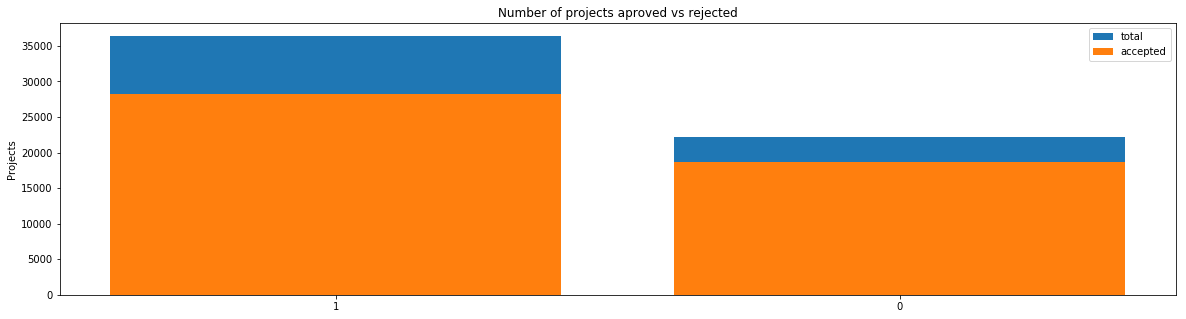

   NoPresentInDesc  project_is_approved  total       Avg
1                1                28172  36383  0.774318
0                0                18656  22163  0.841763
   NoPresentInDesc  project_is_approved  total       Avg
1                1                28172  36383  0.774318
0                0                18656  22163  0.841763


In [56]:
univariate_barplots(project_data, 'NoPresentInDesc', 'project_is_approved', False)

#### Conclusion
 - If number is present in description of resources, the approval rate is 77%
 - Approval rate increases to 83% if number is not present in desciption.
 - It follows that by not including numbers in resources required column, approval rate can be increased. 

## 1.3 Text preprocessing

### 1.3.1 Essay Text

In [57]:
project_data.head(2)


Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           IN        2016-12-05 13:43:57          Grades PreK-2   

                                      project_title  \
0  Educational Support for English Learners at Home   
1  Educational Support for English Learners at Home   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  My students are English learners that are work...   

                                     project_essay_2  ... project_essay_4  \
0  \"The limits of your language are the limits o...  ...             NaN   
1  \"The limits of your language are the limits o...  ...             NaN   

                            project_resource_summary  \
0  My students need opportunities to practice beg...   
1  My students need opportunities to practice beg...   

  teacher_number_of_previously_posted_projects  project_is_approved  \
0                                            0                    0   
1                                            0                    0   

    clean_categories clean_subcategories  \
0  Literacy_Language        ESL Literacy   
1  Literacy_Language        ESL Literacy   

                                               essay quantity  price  \
0  My students are English learners that are work...       23  154.6   
1  My students are English learners that are work...       23  154.6   

   NoPresentInDesc  
0                0  
1                0  

[2 rows x 21 columns]

In [58]:
# printing some random essays.
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[5000])
print("="*50)
print(project_data['essay'].values[9999])
print("="*50)


My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [59]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [60]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

Where do I begin.....my students at my school are awesome! These students come to school each and every day ready to hit the ground running  with their education! They may have struggles but they try their hardest to fight these struggles to become better students.\r\n\r\nMy school is located in a neighborhood that faces many difficulties on a daily basis.It is a poverty stricken neighborhood. My school is a Title 1 school and every student receives free lunches daily. Even though the neighborhood is not the best for these students and their families, they still make it to school each day. The school is most students safe place where they can be themselves and enjoy learning.For this project I am asking for a small amount of materials for our classroom. The materials consist of read along books on cd, colored paper, and ink. All of these materials will be used to support learning in the classroom. \r\n\r\nDonations to this project will allow my students the opportunity to have the mate

In [61]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

Where do I begin.....my students at my school are awesome! These students come to school each and every day ready to hit the ground running  with their education! They may have struggles but they try their hardest to fight these struggles to become better students.    My school is located in a neighborhood that faces many difficulties on a daily basis.It is a poverty stricken neighborhood. My school is a Title 1 school and every student receives free lunches daily. Even though the neighborhood is not the best for these students and their families, they still make it to school each day. The school is most students safe place where they can be themselves and enjoy learning.For this project I am asking for a small amount of materials for our classroom. The materials consist of read along books on cd, colored paper, and ink. All of these materials will be used to support learning in the classroom.     Donations to this project will allow my students the opportunity to have the materials th

In [62]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

Where do I begin my students at my school are awesome These students come to school each and every day ready to hit the ground running with their education They may have struggles but they try their hardest to fight these struggles to become better students My school is located in a neighborhood that faces many difficulties on a daily basis It is a poverty stricken neighborhood My school is a Title 1 school and every student receives free lunches daily Even though the neighborhood is not the best for these students and their families they still make it to school each day The school is most students safe place where they can be themselves and enjoy learning For this project I am asking for a small amount of materials for our classroom The materials consist of read along books on cd colored paper and ink All of these materials will be used to support learning in the classroom Donations to this project will allow my students the opportunity to have the materials they need to succeed in th

In [63]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [64]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████| 58546/58546 [00:38<00:00, 1509.96it/s]


In [65]:
# after preprocesing
preprocessed_essays[2000]

'our middle school students readers writers historians scientists mathematicians artists to become future leaders innovators world need able communicate effectively understand different perspectives reading helps my 8th graders diverse group learners they attend middle school urban neighborhood high rate poverty many not advantages affluent peers they need resources make sure achieve well student today reader tomorrow leader margaret fuller my students leaders tomorrow they need wide range reading materials not become better readers writers also become empathetic people studies shown read literature empathy if create better world future generations need leaders care others understand multiple perspectives by giving students variety books choose improve reading skills turn help improve writing skills having access books also means access world around worlds beyond imagination nannan'

<h3><font color='red'>1.3.2 Project title Text</font></h3>

In [66]:
# similarly you can preprocess the titles also
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           IN        2016-12-05 13:43:57          Grades PreK-2   

                                      project_title  \
0  Educational Support for English Learners at Home   
1  Educational Support for English Learners at Home   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  My students are English learners that are work...   

                                     project_essay_2  ... project_essay_4  \
0  \"The limits of your language are the limits o...  ...             NaN   
1  \"The limits of your language are the limits o...  ...             NaN   

                            project_resource_summary  \
0  My students need opportunities to practice beg...   
1  My students need opportunities to practice beg...   

  teacher_number_of_previously_posted_projects  project_is_approved  \
0                                            0                    0   
1                                            0                    0   

    clean_categories clean_subcategories  \
0  Literacy_Language        ESL Literacy   
1  Literacy_Language        ESL Literacy   

                                               essay quantity  price  \
0  My students are English learners that are work...       23  154.6   
1  My students are English learners that are work...       23  154.6   

   NoPresentInDesc  
0                0  
1                0  

[2 rows x 21 columns]

In [67]:
# printing some random project titles.
print(project_data['project_title'].values[0])
print("="*50)
print(project_data['project_title'].values[150])
print("="*50)
print(project_data['project_title'].values[1000])
print("="*50)
print(project_data['project_title'].values[2000])
print("="*50)
print(project_data['project_title'].values[9999])
print("="*50)

Educational Support for English Learners at Home
Math Masters!
My Education, My Seating Choice! Flexible Seating in the Classroom.
Today a Reader, Tomorrow a Leader
Book Buddies Need Books!


In [68]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [69]:
sent = decontracted(project_data['project_title'].values[20000])
print(sent)
print("="*50)

Listen and Learn!


In [70]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

Listen and Learn 


In [71]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_title = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    #sent = sent.replace('\\r', ' ')
    #sent = sent.replace('\\"', ' ')
    #sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_title.append(sent.lower().strip())

100%|██████████| 58546/58546 [00:01<00:00, 36411.00it/s]


In [72]:
preprocessed_title[20000]

'listen learn'

## 1. 4 Preparing data for models

In [73]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'quantity', 'price',
       'NoPresentInDesc'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data
       
       - quantity : numerical
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.4.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [74]:
sorted_cat_dict.keys()

dict_keys(['SpecialNeeds', 'Care_Hunger', 'Music_Arts', 'Warmth', 'History_Civics', 'Math_Science', 'Literacy_Language', 'AppliedLearning', 'Health_Sports'])

In [75]:
# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['clean_categories'].values)
print(vectorizer.get_feature_names())


categories_one_hot = vectorizer.transform(project_data['clean_categories'].values)
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

['SpecialNeeds', 'Care_Hunger', 'Music_Arts', 'Warmth', 'History_Civics', 'Math_Science', 'Literacy_Language', 'AppliedLearning', 'Health_Sports']
Shape of matrix after one hot encodig  (58546, 9)


In [76]:
# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['clean_subcategories'].values)
print(vectorizer.get_feature_names())


sub_categories_one_hot = vectorizer.transform(project_data['clean_subcategories'].values)
print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)

['Literature_Writing', 'Gym_Fitness', 'Music', 'EnvironmentalScience', 'Warmth', 'Health_Wellness', 'Civics_Government', 'Health_LifeScience', 'History_Geography', 'VisualArts', 'AppliedSciences', 'SpecialNeeds', 'CommunityService', 'Literacy', 'Other', 'ParentInvolvement', 'CharacterEducation', 'Care_Hunger', 'FinancialLiteracy', 'ForeignLanguages', 'ESL', 'Mathematics', 'Extracurricular', 'SocialSciences', 'NutritionEducation', 'EarlyDevelopment', 'TeamSports', 'College_CareerPrep', 'Economics', 'PerformingArts']
Shape of matrix after one hot encodig  (58546, 30)


In [77]:
# feature encoding with teacher_prefix 
teach_prfx = project_data.teacher_prefix.value_counts()
unq_prfx = teach_prfx.index.to_list()
#https://stackoverflow.com/questions/47301795/removing-special-characters-from-a-list-of-items-in-python
unq_prfx = [''.join(e for e in string if e.isalnum()) for string in unq_prfx]
unq_prfx.sort()
#unq_prfx

# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(vocabulary=unq_prfx, lowercase=False, binary=True)
vectorizer.fit(project_data['teacher_prefix'].values.astype('U'))
print(vectorizer.get_feature_names())


teacher_prefix_one_hot = vectorizer.transform(project_data['teacher_prefix'].values.astype('U'))
print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot.shape)

['Mr', 'Mrs', 'Ms', 'Teacher']
Shape of matrix after one hot encodig  (58546, 4)


In [78]:
# feature encoding with state

# dict sort by value python: https://stackoverflow.com/a/613218/4084039
#sub_cat_dict = dict(my_counter)
#sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))
#school_st= project_data.school_state

state_count = project_data.school_state.value_counts()
unq_state = state_count.index.to_list()
unq_state.sort()

# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(vocabulary=unq_state, lowercase=False, binary=True)
vectorizer.fit(project_data['school_state'].values)
print(vectorizer.get_feature_names())


state_one_hot = vectorizer.transform(project_data['school_state'].values)
print("Shape of matrix after one hot encodig ",state_one_hot.shape)

['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
Shape of matrix after one hot encodig  (58546, 51)


In [79]:
# feature encoding with  project_grade_category
grade_ct_count = project_data.project_grade_category.value_counts()
pj_grd_cat = grade_ct_count.index.to_list()
pj_grd_cat.sort()
pj_grd_cat

# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(vocabulary=pj_grd_cat, lowercase=False, binary=True)
vectorizer.fit(project_data['project_grade_category'].values.astype('U'))
print(vectorizer.get_feature_names())


project_grade_category_one_hot = vectorizer.transform(project_data['project_grade_category'].values.astype('U'))
print("Shape of matrix after one hot encodig ",project_grade_category_one_hot.shape)

['Grades 3-5', 'Grades 6-8', 'Grades 9-12', 'Grades PreK-2']
Shape of matrix after one hot encodig  (58546, 4)


### 1.4.2 Vectorizing Text data

#### 1.4.2.1 Bag of words

In [80]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10,max_features = 500)
text_bow = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_bow.shape)

Shape of matrix after one hot encodig  (58546, 500)


<h4><font color='red'> 1.4.2.2 Bag of Words on `project_title`</font></h4>

In [81]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10,max_features = 500)
title_bow = vectorizer.fit_transform(preprocessed_title)
print("Shape of matrix after one hot encodig ",title_bow.shape)

Shape of matrix after one hot encodig  (58546, 500)


#### 1.4.2.3 TFIDF vectorizer

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10,max_features = 500)
text_tfidf = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_tfidf.shape)

Shape of matrix after one hot encodig  (58546, 500)


<h4><font color='red'> 1.4.2.4 TFIDF Vectorizer on `project_title`</font></h4>

In [83]:
# Similarly you can vectorize for title also
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10,max_features = 500)
title_tfidf = vectorizer.fit_transform(preprocessed_title)
print("Shape of matrix after one hot encodig ",title_tfidf.shape)

Shape of matrix after one hot encodig  (58546, 500)


#### 1.4.2.5 Using Pretrained Models: Avg W2V

In [84]:
##https://www.geeksforgeeks.org/working-zip-files-python/
'''from zipfile import ZipFile 
file_name = "glove.42B.300d.zip"
# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zipr: 
    # printing all the contents of the zip file 
    zipr.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zipr.extractall() 
    print('Done!') 
'''

'from zipfile import ZipFile \nfile_name = "glove.42B.300d.zip"\n# opening the zip file in READ mode \nwith ZipFile(file_name, \'r\') as zipr: \n    # printing all the contents of the zip file \n    zipr.printdir() \n  \n    # extracting all the files \n    print(\'Extracting all the files now...\') \n    zipr.extractall() \n    print(\'Done!\') \n'

In [85]:

# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('./glove.42B.300d.txt')

# ============================

# ============================

words = []
for i in preprocessed_essays:
    words.extend(i.split(' '))

for i in preprocessed_title:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)




226it [00:00, 2257.54it/s]

Loading Glove Model


1917495it [03:48, 8398.16it/s]


Done. 1917495  words loaded!
all the words in the coupus 9379604
the unique words in the coupus 23317
The number of words that are present in both glove vectors and our coupus 22352 ( 95.861 %)
word 2 vec length 22352


In [86]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [87]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))

100%|██████████| 58546/58546 [00:17<00:00, 3436.79it/s]

58546
300


<h4><font color='red'> 1.4.2.6 Using Pretrained Models: AVG W2V on `project_title`</font></h4>

In [88]:
# Similarly you can vectorize for title also
avg_w2v_vectors_pj_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_title): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_pj_title.append(vector)

print(len(avg_w2v_vectors_pj_title))
print(len(avg_w2v_vectors_pj_title[0]))

100%|██████████| 58546/58546 [00:00<00:00, 73218.12it/s]

58546
300


#### 1.4.2.7 Using Pretrained Models: TFIDF weighted W2V

In [89]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [90]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))

100%|██████████| 58546/58546 [02:04<00:00, 472.11it/s]

58546
300


<h4><font color='red'> 1.4.2.9 Using Pretrained Models: TFIDF weighted W2V on `project_title`</font></h4>

In [91]:
# Similarly you can vectorize for title also
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_title)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words_title = set(tfidf_model.get_feature_names())

In [92]:
# average Word2Vec
# compute average word2vec for each title.
tfidf_w2v_vectors_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_title): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_title):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_title.append(vector)

print(len(tfidf_w2v_vectors_title))
print(len(tfidf_w2v_vectors_title[0]))

100%|██████████| 58546/58546 [00:02<00:00, 29226.35it/s]

58546
300


### 1.4.3 Vectorizing Numerical features

In [93]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print("Mean :" + str(price_scalar.mean_[0]) + ", Standard deviation :" + str(np.sqrt(price_scalar.var_[0])))

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

Mean :386.28684487411607, Standard deviation :366.13610053619476


In [94]:
price_standardized

array([[-0.63278886],
       [-0.63278886],
       [-0.63278886],
       ...,
       [-0.4752245 ],
       [-0.4752245 ],
       [-0.4752245 ]])

In [95]:
teacher_no_pr_scalar = StandardScaler()
teacher_no_pr_scalar.fit(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print("Mean :" + str(teacher_no_pr_scalar.mean_[0]) + ", Standard deviation :" + str(np.sqrt(teacher_no_pr_scalar.var_[0])))

# Now standardize the data with above maen and variance.
teacher_no_pr_standardized = teacher_no_pr_scalar.transform(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

Mean :11.962029856864687, Standard deviation :29.04335010692111


In [96]:
teacher_no_pr_standardized

array([[-0.41186811],
       [-0.41186811],
       [-0.41186811],
       ...,
       [-0.23971167],
       [-0.23971167],
       [-0.23971167]])

### 1.4.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [97]:
print(categories_one_hot.shape)
print(sub_categories_one_hot.shape)
print(text_bow.shape)
print(price_standardized.shape)

(58546, 9)
(58546, 30)
(58546, 500)
(58546, 1)


In [100]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_bow = hstack((categories_one_hot, sub_categories_one_hot, price_standardized,project_grade_category_one_hot,
                state_one_hot,teacher_prefix_one_hot,teacher_no_pr_standardized,title_bow))
X_bow.shape

(58546, 600)

In [101]:
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_tfidf = hstack((categories_one_hot, sub_categories_one_hot, price_standardized,project_grade_category_one_hot,
                state_one_hot,teacher_prefix_one_hot,teacher_no_pr_standardized,title_tfidf))
X_tfidf.shape


(58546, 600)

In [102]:
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_avg_w2v = hstack((categories_one_hot, sub_categories_one_hot, price_standardized,project_grade_category_one_hot,
                state_one_hot,teacher_prefix_one_hot,teacher_no_pr_standardized,avg_w2v_vectors_pj_title))
X_avg_w2v.shape


(58546, 400)

In [103]:
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_tfidf_w2v = hstack((categories_one_hot, sub_categories_one_hot, price_standardized,project_grade_category_one_hot,
                state_one_hot,teacher_prefix_one_hot,teacher_no_pr_standardized,tfidf_w2v_vectors_title))
X_tfidf_w2v.shape


(58546, 400)

<h1><font color='red'>Assignment 2: Apply TSNE<font></h1>

 <font color=#F4274F>If you are using any code snippet from the internet, you have to provide the reference/citations, as we did in the above cells. Otherwise, it will be treated as plagiarism without citations.</font>

<ol> 
    <li> In the above cells we have plotted and analyzed many features. Please observe the plots and write the observations in markdown cells below every plot.</li>
    <li> EDA: Please complete the analysis of the feature: teacher_number_of_previously_posted_projects</li>
    <li>
        <ul>Build the data matrix using these features 
            <li>school_state : categorical data (one hot encoding)</li>
            <li>clean_categories : categorical data (one hot encoding)</li>
            <li>clean_subcategories : categorical data (one hot encoding)</li>
            <li>teacher_prefix : categorical data (one hot encoding)</li>
            <li>project_grade_category : categorical data (one hot encoding)</li>
            <li>project_title : text data (BOW, TFIDF, AVG W2V, TFIDF W2V)</li>
            <li>price : numerical</li>
            <li>teacher_number_of_previously_posted_projects : numerical</li>
         </ul>
    </li>
    <li> Now, plot FOUR t-SNE plots with each of these feature sets.
        <ol>
            <li>categorical, numerical features + project_title(BOW)</li>
            <li>categorical, numerical features + project_title(TFIDF)</li>
            <li>categorical, numerical features + project_title(AVG W2V)</li>
            <li>categorical, numerical features + project_title(TFIDF W2V)</li>
        </ol>
    </li>
    <li> Concatenate all the features and Apply TNSE on the final data matrix </li>
    <li> <font color='blue'>Note 1: The TSNE accepts only dense matrices</font></li>
    <li> <font color='blue'>Note 2: Consider only 5k to 6k data points to avoid memory issues. If you run into memory error issues, reduce the number of data points but clearly state the number of datat-poins you are using</font></li>
</ol>

<class 'numpy.ndarray'>


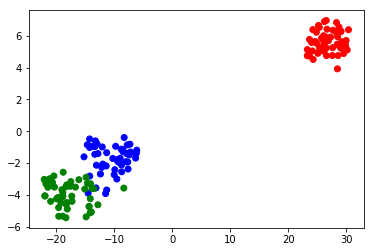

In [104]:
# this is the example code for TSNE
import numpy as np
from sklearn.manifold import TSNE
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

iris = datasets.load_iris()
x = iris['data']
y = iris['target']

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)
print(type(y))
X_embedding = tsne.fit_transform(x)
# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray()) , .toarray() will convert the sparse matrix into dense matrix
#print(X_embedding.shape)
for_tsne = np.hstack((X_embedding, y.reshape(-1,1)))
#print(for_tsne.shape)
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])
colors = {0:'red', 1:'blue', 2:'green'}
plt.scatter(for_tsne_df['Dimension_x'], for_tsne_df['Dimension_y'], c=for_tsne_df['Score'].apply(lambda x: colors[x]))
plt.show()
#iris

<h2> 2.1 TSNE with `BOW` encoding of `project_title` feature </h2>

In [105]:
#for_tsne.shape
#project_data.shape
#type(title_bow)
#y.shape
#https://stackoverflow.com/questions/30502284/a-sparse-matrix-was-passed-but-dense-data-is-required-use-x-toarray-to-conve/37248794
#title_bow_dense = title_bow.toarray()
#title_bow_dense.shape

In [106]:
#https://www.datacamp.com/community/tutorials/introduction-t-sne
#https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781783989485/1/ch01lvl1sec21/using-truncated-svd-to-reduce-dimensionality
from sklearn.decomposition import TruncatedSVD
truncSVD = TruncatedSVD(n_components=2)
truncSVD_result_2 = truncSVD.fit_transform(X_bow)
truncSVD_result_2.shape

(58546, 2)

In [107]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=50, learning_rate=400)

In [108]:
import time
time_start = time.time()
X_embedding = tsne.fit_transform(truncSVD_result_2)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 560.2410562038422 seconds


In [109]:
# please write all of the code with proper documentation and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

#https://stackoverflow.com/questions/30502284/a-sparse-matrix-was-passed-but-dense-data-is-required-use-x-toarray-to-conve/37248794

y=project_data['project_is_approved'].values
X_embedding.shape

(58546, 2)

In [110]:
#https://stackoverflow.com/questions/22257836/numpy-hstack-valueerror-all-the-input-arrays-must-have-same-number-of-dimens
#from scipy import sparse
#for_tsne = sparse.vstack([X_embedding,  y])
#https://stackoverflow.com/questions/38848759/valueerror-all-the-input-arrays-must-have-same-number-of-dimensions
for_tsne=np.concatenate((X_embedding,y.reshape(-1,1)),axis=1)
for_tsne.shape

(58546, 3)

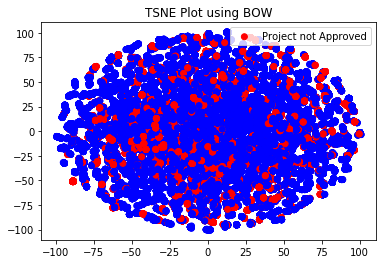

In [111]:
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x', 'Dimension_y','Score'])
colors = {0:'red', 1:'blue'}
plt.scatter(for_tsne_df['Dimension_x'], for_tsne_df['Dimension_y'], c=for_tsne_df['Score'].apply(lambda x: colors[x]))

plt.legend(['Project not Approved','Project is approved'])
plt.title('TSNE Plot using BOW')
plt.show()

### Conclusion
- Anything can't be inferred from the above chart.

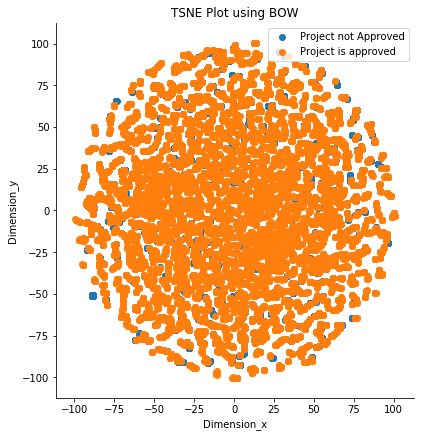

In [112]:
# Ploting the result of tsne
import seaborn as sn
sn.FacetGrid(for_tsne_df, hue="Score", size=6).map(plt.scatter, 'Dimension_x', 'Dimension_y')
plt.legend(['Project not Approved','Project is approved'])
plt.title('TSNE Plot using BOW')
plt.show()

#for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])
#colors = {0:'red', 1:'blue'}
#plt.scatter(for_tsne_df['Dimension_x'], for_tsne_df['Dimension_y'], c=for_tsne_df['Score'].apply(lambda x: colors[x]))
#plt.show()

### Conclusion
- Anything can't be inferred from the above chart.

<h2> 2.2 TSNE with `TFIDF` encoding of `project_title` feature </h2>

In [113]:
# please write all the code with proper documentation, and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

#https://www.datacamp.com/community/tutorials/introduction-t-sne
#https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781783989485/1/ch01lvl1sec21/using-truncated-svd-to-reduce-dimensionality
from sklearn.decomposition import TruncatedSVD
truncSVD = TruncatedSVD(n_components=2)
truncSVD_result_2 = truncSVD.fit_transform(X_tfidf)
truncSVD_result_2.shape

(58546, 2)

In [114]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)
y=project_data['project_is_approved'].values

In [115]:
#https://www.datacamp.com/community/tutorials/introduction-t-sne
import time
time_start = time.time()
X_embedding = tsne.fit_transform(truncSVD_result_2)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 492.38667130470276 seconds


In [116]:
#https://stackoverflow.com/questions/38848759/valueerror-all-the-input-arrays-must-have-same-number-of-dimensions
for_tsne=np.concatenate((X_embedding,y.reshape(-1,1)),axis=1)
for_tsne.shape

(58546, 3)

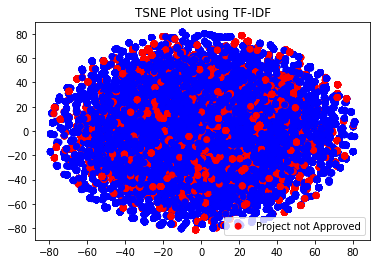

In [117]:
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])
colors = {0:'red', 1:'blue'}
plt.scatter(for_tsne_df['Dimension_x'], for_tsne_df['Dimension_y'], c=for_tsne_df['Score'].apply(lambda x: colors[x]))
plt.legend(['Project not Approved','Project is approved'])
plt.title('TSNE Plot using TF-IDF')
plt.show()

### Conclusion
- Anything can't be inferred from the above chart.

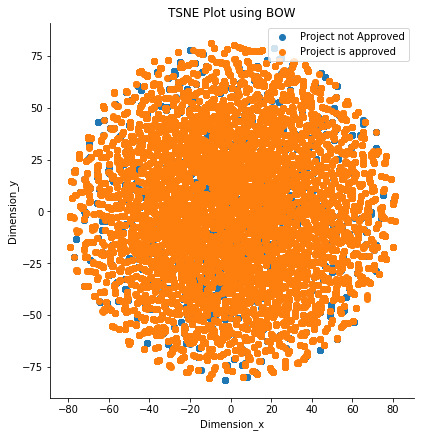

In [118]:
# Ploting the result of tsne
import seaborn as sn
sn.FacetGrid(for_tsne_df, hue="Score", size=6).map(plt.scatter, 'Dimension_x', 'Dimension_y')
plt.legend(['Project not Approved','Project is approved'])
plt.title('TSNE Plot using BOW')
plt.show()

### Conclusion
- Anything can't be inferred from the above chart.

<h2> 2.3 TSNE with `AVG W2V` encoding of `project_title` feature </h2>

In [119]:
# please write all the code with proper documentation, and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    

In [120]:
#https://www.datacamp.com/community/tutorials/introduction-t-sne
#https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781783989485/1/ch01lvl1sec21/using-truncated-svd-to-reduce-dimensionality
from sklearn.decomposition import TruncatedSVD
truncSVD = TruncatedSVD(n_components=2)
truncSVD_result_2 = truncSVD.fit_transform(X_avg_w2v)
truncSVD_result_2.shape

(58546, 2)

In [121]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)
y=project_data['project_is_approved'].values
X_embedding.shape

(58546, 2)

In [122]:
import time
time_start = time.time()
X_embedding = tsne.fit_transform(truncSVD_result_2)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 498.5109214782715 seconds


In [123]:
#https://stackoverflow.com/questions/38848759/valueerror-all-the-input-arrays-must-have-same-number-of-dimensions
for_tsne=np.concatenate((X_embedding,y.reshape(-1,1)),axis=1)
for_tsne.shape

(58546, 3)

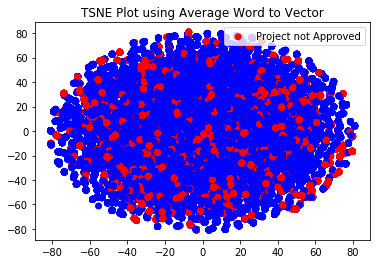

In [124]:
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])
colors = {0:'red', 1:'blue'}
plt.scatter(for_tsne_df['Dimension_x'], for_tsne_df['Dimension_y'], c=for_tsne_df['Score'].apply(lambda x: colors[x]))
plt.legend(['Project not Approved','Project is approved'])
plt.title('TSNE Plot using Average Word to Vector')
plt.show()

### Conclusion
- Anything can't be inferred from the above chart.

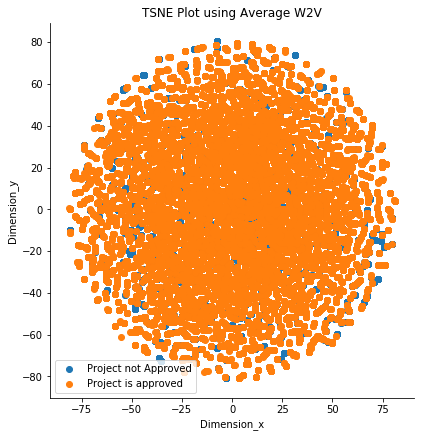

In [125]:
# Ploting the result of tsne
import seaborn as sn
sn.FacetGrid(for_tsne_df, hue="Score", size=6).map(plt.scatter,'Dimension_x', 'Dimension_y')
plt.legend(['Project not Approved','Project is approved'])
plt.title('TSNE Plot using Average W2V')
plt.show()

### Conclusion
- Anything can't be inferred from the above chart.

<h2> 2.4 TSNE with `TFIDF Weighted W2V` encoding of `project_title` feature </h2>

In [ ]:
# please write all the code with proper documentation, and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    

In [126]:
#https://www.datacamp.com/community/tutorials/introduction-t-sne
#https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781783989485/1/ch01lvl1sec21/using-truncated-svd-to-reduce-dimensionality
from sklearn.decomposition import TruncatedSVD
truncSVD = TruncatedSVD(n_components=2)
truncSVD_result_2 = truncSVD.fit_transform(X_tfidf_w2v)
truncSVD_result_2.shape

(58546, 2)

In [127]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)
y=project_data['project_is_approved'].values
X_embedding.shape

(58546, 2)

In [128]:
import time
time_start = time.time()
X_embedding = tsne.fit_transform(truncSVD_result_2)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 493.36756348609924 seconds


In [129]:
#https://stackoverflow.com/questions/38848759/valueerror-all-the-input-arrays-must-have-same-number-of-dimensions
for_tsne=np.concatenate((X_embedding,y.reshape(-1,1)),axis=1)
for_tsne.shape

(58546, 3)

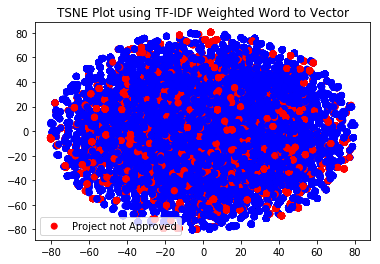

In [130]:
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])
colors = {0:'red', 1:'blue'}
plt.scatter(for_tsne_df['Dimension_x'], for_tsne_df['Dimension_y'], c=for_tsne_df['Score'].apply(lambda x: colors[x]))
plt.legend(['Project not Approved','Project is approved'])
plt.title('TSNE Plot using TF-IDF Weighted Word to Vector')
plt.show()

### Conclusion
- Anything can't be inferred from the above chart.

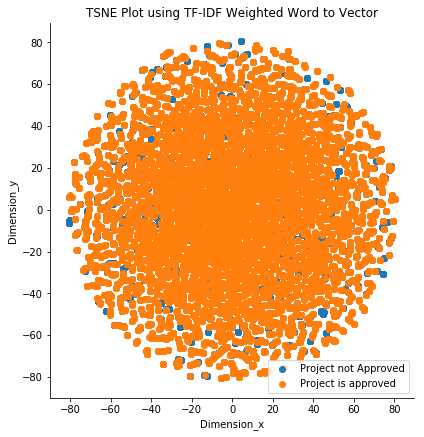

In [131]:
# Ploting the result of tsne
import seaborn as sn
sn.FacetGrid(for_tsne_df, hue="Score", size=6).map(plt.scatter, 'Dimension_x', 'Dimension_y')
plt.legend(['Project not Approved','Project is approved'])
plt.title('TSNE Plot using TF-IDF Weighted Word to Vector')
plt.show()

### Conclusion
- Anything can't be inferred from the above chart.

<h2> 2.5 Summary </h2>

 - There are 17 columns in the project_data namely 'id' 'teacher_id' 'teacher_prefix' 'school_state' 'project_submitted_datetime' 'project_grade_category' 'project_subject_categories' 'project_subject_subcategories' 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3' 'project_essay_4' 'project_resource_summary' 'teacher_number_of_previously_posted_projects' 'project_is_approved'.
 - There are 4 columns in resources data frames namely id, description, quantity and price.
- we have an unbalanced dataset with 85% projects as approved and around 15% as not accepted projects. 
- Overall ND and KS states have highest approvel rate while WY and SD states have lowerest approvel rate.
- CA and NY have the top two states with highest number of projects that are approved with high approval ratio of 85% and 88%.
- WY and VT states have lowest numbers of projects being stubmmited. WY has very low approval rate.
- ND has 100% approval rate.
- Female teachers with prefix "Mrs" or "Ms" are submitting highest number of projects for approval.
- Highest number of projects are being posted for lower grades i.e. PreK-2 and 3-5 with approval rate close to overall approval rate.
- Under Literacy Language, Math and Science category have the highest number of projects that are submitted.
- Literacy Language, History and Civics, Warmth and Care category have high approval rates (being above average) at 94% and 91%.
- As with categories, Literacy and Mathematics are two main subcategories under which maximum projects are submitted.
- Number of words in project title follows a bell curve.
- Titles with over 12 words are rare but have high approval rate.
- Number of words in project essay is right skew with long tail.
- 25% projects get approved for teachers who have never posted any projects while the rejection percentage is 30%.
- Teachers have higher chance of approval (95%) once they have posted over 31 projects.
- By not including numbers in resources required column, approval rate can be increased.
- We couldn't infer much from ploting TSNE plots for BOW, TF-IDF, Average W2V and TF-IDF W2V